## Task 1:
### Problem - Develop and evaluate an image classifier using Convolution Neural Network.

### The Data = CIFAR 10 datset.

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.
https://www.cs.toronto.edu/~kriz/cifar.html


# CIFAR-10 Multiple Classes
# New section
Example of using Keras for CNNs. Use a famous data set, the CIFAR-10 dataset which consists of 10 different image types.

In [1]:
#
# Your code to import matplotlib, pandas and numpy libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#



Following code loads the CIFAR 10 datset.

In [2]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
#
# Your code to print shapes of training and test data. Check how the data looks
x_train.shape, y_train.shape, x_test.shape, y_test.shape
#

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [4]:
# Your code to print the shape of one image.
print(x_train[0].shape)

(32, 32, 3)


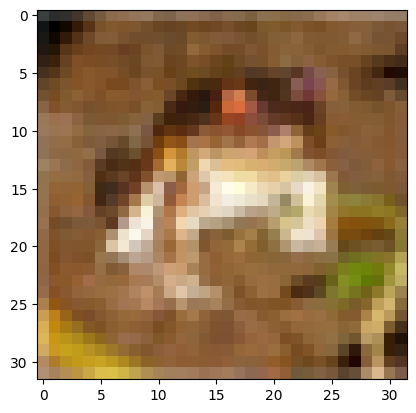

In [5]:
# Your code to show any sample image in the dataset. Use - plt.imshow()
img = plt.imshow(x_train[0])

In [6]:
classes=['aircraft', 'car', 'bird', 'cat', 'deer',
'dog', 'frog', 'hors', 'ship', 'truck']

frog


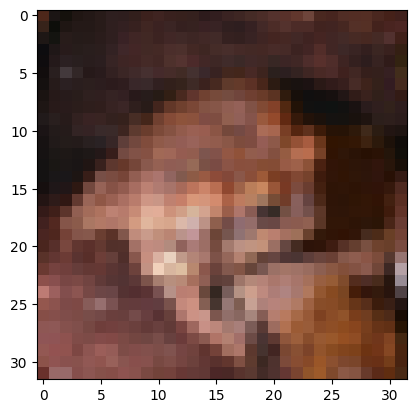

In [7]:
# Show any other image
import random
n = random.randint(0,50000)
plt.imshow(x_train[n])
print(classes[int(y_train[n])])

# PreProcessing

In [8]:
# Your code to print one image in digitals. Check how pixels look like. 
print(x_train[n])

[[[ 77  39  26]
  [ 27  21  20]
  [ 21  17  12]
  ...
  [ 74  39  31]
  [ 69  33  25]
  [ 64  32  28]]

 [[ 55  35  26]
  [ 13  14  10]
  [ 31  22  19]
  ...
  [ 67  34  28]
  [ 73  36  32]
  [ 76  38  35]]

 [[ 30  23  21]
  [ 20  20  16]
  [ 40  28  26]
  ...
  [ 69  42  37]
  [ 82  49  47]
  [ 64  32  25]]

 ...

 [[147  88  83]
  [147  82  81]
  [145  83  79]
  ...
  [114  53  24]
  [133  71  35]
  [ 73  36  15]]

 [[140  83  74]
  [144  84  82]
  [137  81  78]
  ...
  [105  48  22]
  [116  61  26]
  [ 72  35  16]]

 [[105  49  44]
  [153 105 104]
  [152 106 106]
  ...
  [ 91  42  24]
  [ 96  45  16]
  [ 73  41  21]]]


In [9]:
# Your code to print shape of any image i.e particular value in the x_train
x_train[n].shape

(32, 32, 3)

In [10]:
# Your code to print the maximum value in x_train. Hint - Use .max()
x_train[n].max()

241

In [11]:
x_train = x_train/255
x_test = x_test/255

In [12]:
# Print the shape of x_train again.
x_train[n].shape

(32, 32, 3)

In [13]:
# Print the shape of y_train again.
y_train.shape

(50000, 1)

# One hot vector encoding.
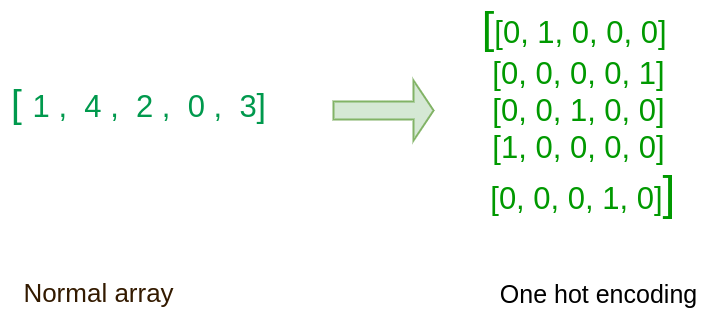


The "to_categorical()" is converting the integer value to binary categorical matrix :: https://keras.io/api/utils/python_utils/#to_categorical-functionLinks to an external site.

In [14]:
from tensorflow.keras.utils import to_categorical

# Your code to print shape of y_train [0]

# Your code to use to_categorical to convert integers to numbers. Assign the new array to the variable y_cat_train

y_cat_train = to_categorical(y_train)
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [15]:
# Your code to print shape of the array y_cat_train
y_cat_train.shape

(50000, 10)

In [16]:
# Your code to print any single value in the array y_cat_train and print y_train with the same index.
y_cat_train[0], y_train[0]
# Compare the result for better understanding of "to_categorical()"

(array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32),
 array([6], dtype=uint8))

In [17]:
# Your code to:
# Convert y_test to the encoded vector in same manner/ Assign it to the variable y_cat_test
y_cat_test = to_categorical(y_test)

# Print the shapes to look how y_cat_test looks.
y_cat_test.shape

(10000, 10)

----------
# Building the Model

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

#### Please read the following links before creating code for the next cell

https://keras.io/api/layers/convolution_layers/convolution2d/
    
https://keras.io/api/layers/pooling_layers/max_pooling2d/

In [19]:
model = Sequential()


model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))

#
# Add more convolution and pooling layers with your choice of filters, strides, and activation function
model.add(Conv2D(filters=32, kernel_size=(4,4), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))
#

model.add(Flatten())

#
# Add few dense layers. 
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
#




In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

### We could use early stopping in Keras to break from the training.
### What this does is for successive iterations it monitors the loss. If the loss does not decreases for a certain number of iterations denoted by variable 'patience' then the training stops.
### Following code shows how you can use early stopping.


In [22]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [23]:
# Your code to compile the models (model.compile). Use 'categorical cross entropy' as the loss function
# and use 'accuracy' as the metrics
# Your can use the optimiser of your choice
model.compile(loss = 'categorical_crossentropy',
                optimizer = 'adam', 
                 metrics = ['accuracy'])


In [24]:
x_train.shape

(50000, 32, 32, 3)

In [25]:
# Your code to fit the model (model.fit). Use additional parameter -  callbacks = [early_stop] to eanable early stopping. 
# use 'history' array to save the training parameters for each epoch
history = model.fit(x_train, y_cat_train, validation_data=(x_test, y_cat_test), epochs = 50, callbacks = [early_stop])

Epoch 1/50


1563/1563 [==============================] - 7s 4ms/step - loss: 1.4606 - accuracy: 0.4743 - val_loss: 1.2027 - val_accuracy: 0.5782
Epoch 2/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1288 - accuracy: 0.6012 - val_loss: 1.0773 - val_accuracy: 0.6173
Epoch 3/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9746 - accuracy: 0.6619 - val_loss: 1.0357 - val_accuracy: 0.6357
Epoch 4/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8655 - accuracy: 0.6989 - val_loss: 0.9925 - val_accuracy: 0.6562
Epoch 5/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7742 - accuracy: 0.7316 - val_loss: 0.9598 - val_accuracy: 0.6690
Epoch 6/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6881 - accuracy: 0.7606 - val_loss: 0.9649 - val_accuracy: 0.6759


### We can save the model in a file. Following code shows how to do this.

In [26]:
# Careful, don't overwrite file!
model.save('cifar_10epochs.keras')

### We can save the loss at every step. Following code shows how to do this. 

In [27]:
losses = pd.DataFrame(model.history.history)

In [28]:
# Print first few rows of losses.
losses.head(5)

,loss,accuracy,val_loss,val_accuracy
0,1.460634,0.47430,1.202655,0.5782
1,1.128778,0.60118,1.077269,0.6173
2,0.974553,0.66188,1.035713,0.6357
3,0.865516,0.69892,0.992470,0.6562
4,0.774210,0.73158,0.959754,0.6690


### Visualise a plot between accuracy vs val_accuracy for all steps.

### x axis will have the steps (epochs) 
### y axis will have accuracy and val_accuracy 





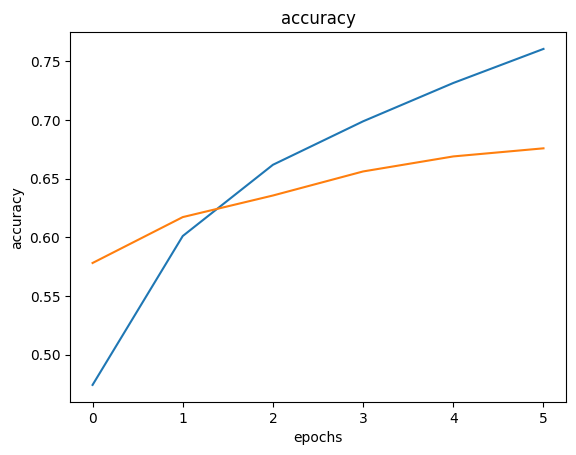

In [29]:
# 
# Your code to plot accuracy and val_accuracy vs the epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.show()
#

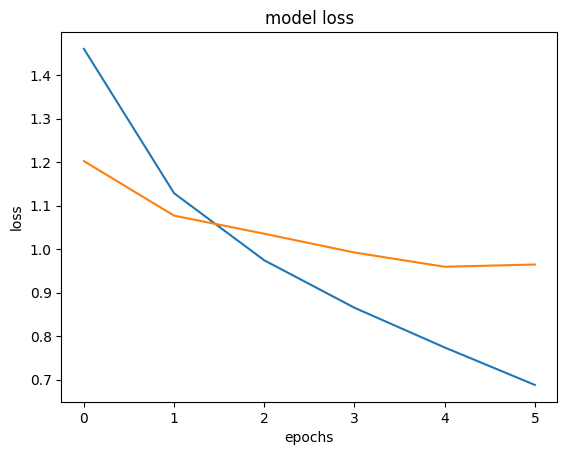

In [30]:
# 
# Your code to plot loss and val_loss vs the epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()
#

### You could print the metrics name that model have used.

### Following code shows how to do this.

In [31]:
model.metrics_names

['loss', 'accuracy']

### Following code shows how to evaluate your model.

In [32]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.9649235606193542, 0.6758999824523926]

### Make a prediction on test data set.   

In [33]:
predictions_prob = model.predict(x_test)
predictions = predictions_prob.argmax(axis = -1)

313/313 [==============================] - 0s 1ms/step


### We could get the full classification report. 

In [34]:
# Your code to import classification_report library from sklearn.metrics
from sklearn.metrics import classification_report

In [35]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.65      0.80      0.72      1000\n           1       0.77      0.83      0.80      1000\n           2       0.54      0.60      0.57      1000\n           3       0.48      0.54      0.51      1000\n           4       0.65      0.58      0.61      1000\n           5       0.58      0.56      0.57      1000\n           6       0.69      0.81      0.75      1000\n           7       0.79      0.69      0.74      1000\n           8       0.84      0.73      0.78      1000\n           9       0.88      0.61      0.72      1000\n\n    accuracy                           0.68     10000\n   macro avg       0.69      0.68      0.68     10000\nweighted avg       0.69      0.68      0.68     10000\n'

### We could also get and plot confusion matrix. 

https://github.com/matplotlib/matplotlib/issues/14751

In [36]:
# Your code to import confusion_matrix library from sklearn.metrics
from sklearn.metrics import confusion_matrix

In [37]:
confusion_matrix(y_test,predictions)

array([[798,  12,  65,  14,  18,   6,  13,  11,  46,  17],
       [ 34, 828,  18,  20,   5,   6,  23,  10,  29,  27],
       [ 72,   7, 599,  78,  75,  75,  69,  15,   6,   4],
       [ 43,   9,  77, 544,  50, 158,  82,  24,   7,   6],
       [ 37,   4, 109, 102, 577,  41,  75,  43,  10,   2],
       [ 19,   3,  76, 204,  36, 564,  45,  45,   4,   4],
       [  7,   8,  52,  59,  32,  18, 814,   7,   3,   0],
       [ 27,   4,  51,  53,  72,  70,  17, 694,   3,   9],
       [117,  48,  29,  26,   9,   9,  10,   7, 731,  14],
       [ 73, 148,  30,  29,   9,  18,  24,  25,  34, 610]], dtype=int64)

<Axes: >

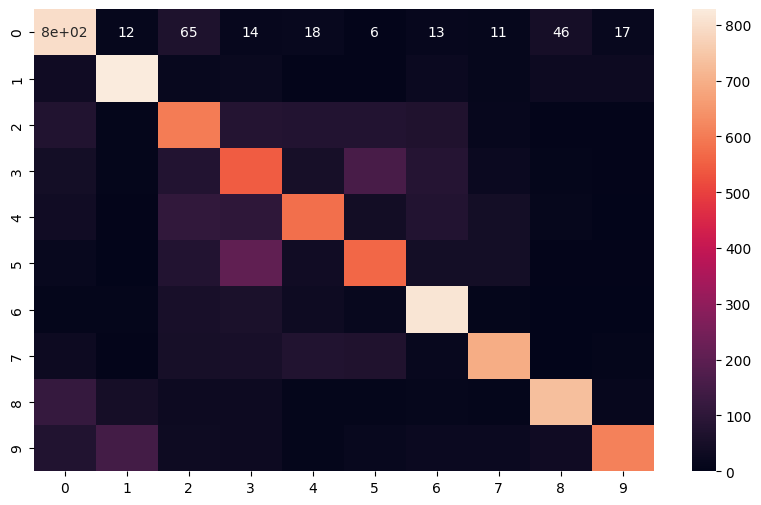

In [38]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)


# Following code makes a prediction on specific image.

In [39]:
my_image = x_test[16]

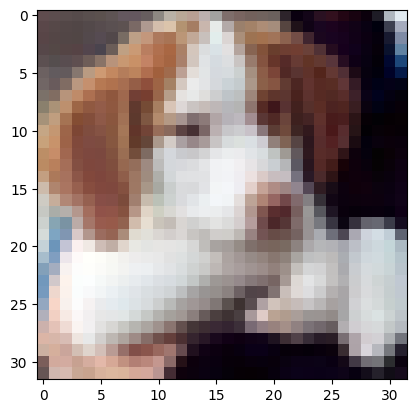

In [40]:
plt.imshow(my_image)

In [41]:
# SHAPE --> (num_images,width,height,color_channels)

model.predict(my_image.reshape(1,32,32,3))

1/1 [==============================] - 0s 30ms/step


array([[1.6227081e-07, 9.4132693e-06, 3.2369661e-04, 2.8765924e-02,
        4.6008577e-06, 9.7046214e-01, 2.3659710e-04, 1.9257820e-04,
        2.5903207e-06, 2.3026532e-06]], dtype=float32)

In [42]:
# Find the highest probability value in the vector above. 

# What output value does it point to?

In [43]:
# Check your result to run the code:

np.argmax(model.predict(my_image.reshape(1,32,32,3)), axis = -1)

1/1 [==============================] - 0s 17ms/step


array([5], dtype=int64)

### Let's use a trained neural network
You can run the following code many times

Note the recognition probabilities for each image

1/1 [==============================] - 0s 19ms/step


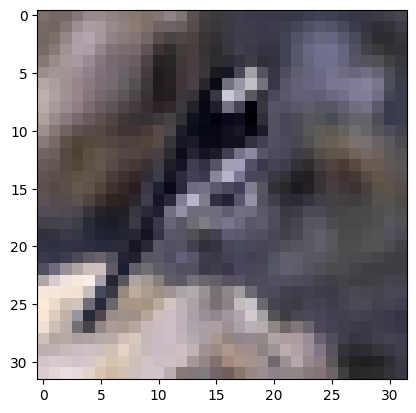

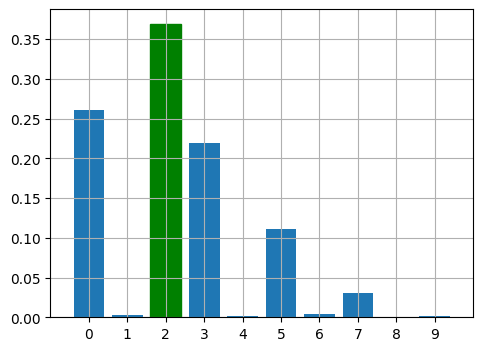

The predicted answer: bird 
 Correct answer: bird
['aircraft', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'hors', 'ship', 'truck']


In [46]:
from tensorflow.keras.preprocessing.image import array_to_img

# Class names in the CIFAR-10 dataset
classes=['aircraft', 'car', 'bird', 'cat', 'deer',
'dog', 'frog', 'hors', 'ship', 'truck']

# we take a random element 'random.randint()' from the test sample
# and observe: the neural network will guess or not
index = random.randint(0, x_test.shape[0])
plt.imshow(array_to_img(x_test[index]))

# test image conversion
x = x_test[index]
x = np.expand_dims(x, axis=0)

# start recognition
prediction = model.predict(x)
sample = x

# converting the result from one hot encoding format
ans = np.argmax(prediction)

fig = plt.figure(figsize=(12,4))

ax = fig.add_subplot(1, 2, 2)
bar_list = ax.bar(np.arange(10), prediction[0], align='center')
bar_list[ans].set_color('g')
ax.set_xticks(np.arange(10))
ax.set_xlim([-1, 10])
ax.grid('on')

plt.show()

print('The predicted answer: {}'.format((classes[ans])), "\n",
     'Correct answer: {}'.format(classes[y_test[index][0]]) )

print(classes)


# You can run this cell many times, and each time you will get a new picture,which
# this neural network will recognise with the probability indicated on the graph.

## Task 2:

Evaluate your model for different optimisers available in the Keras. 

https://keras.io/api/optimizers/

- Store the optimisers in an array.
- Use for loop to fit, compile, and  test your model.
- Plot the accuracy vs optimiser


In [45]:
# Create a list containing the names of optimisers (Don't use 'AdamW' and 'Adafactor')
# Create an empty list to store scores

# For every optimiser
   # compile your model
   # fit your model, use epochs=3 for each optimiser (otherwise the training will take a long time)
   # using model.evaluate() find score and append the score in a list

# Plot score vs optimiser 

# Lab logbook requirement: 
# Please ensure to document in your laboratory logbook a graphical representation depicting the train loss and validation loss trends. 
# Based on this analysis, determine the optimal number of epochs for training your model. 